<a href="https://colab.research.google.com/github/jong9810/TensorFlow-2.0/blob/main/9_Functional_API_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9. Functional API
- 기존에는 Sequential API 방식으로 모델을 구축했었다.

### Functional API 필요성
- Sequential API 방식은 입력부터 출력까지 일직선으로 연결되어 있어 직관적이고 편리하지만, 여러 개의 층을 공유하거나 다양한 종류의 입출력을 사용하는 복잡한 모델을 만들기에는 한계가 있다.

### Sequential API Vs. Functional API
- 모델을 구축하는 단계를 제외하면 거의 동일한 과정으로 진행된다.


## Functional API 모델 구축

1. 입력 데이터 shape을 tensorflow.keras.layers.Input()함수의 인자로 입력하여 입력층을 정의한다.
1. 이전 층 출력 값을 다음 층 함수의 입력 값으로 사용한 후
1. tensorflow.keras.models.Model()함수에 입력과 출력을 넣어주어 모델 구축을 완료한다.


### Functional API 모델 구축 예시1 : 입력이 1개일 때

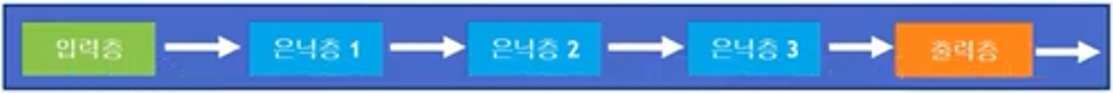

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
input_ = Input(shape=(4, )) # 입력층 정의

# 은닉층 정의
x = Dense(8, activation='relu')(input_) # 은닉층1 (입력값 : input_=입력층 출력, 노드 수 : 8)
x = Dense(16, activation='relu')(x)     # 은닉층2 (입력값 : x=은닉층1 출력, 노드 수 : 16)
x = Dense(32, activation='relu')(x)     # 은닉층3 (입력값 : x=은닉층2 출력, 노드 수 : 32)

# 출력층 정의
output_ = Dense(10, activation='softmax')(x) # 출력층 : (입력값 : x=은닉층3 출력, 노드 수 : 10)

# 모델 구축
model = Model(inputs=input_, outputs=output_)

model.summary()

### Functional API 모델 구축 예시1 : 입력이 1개 이상일 때

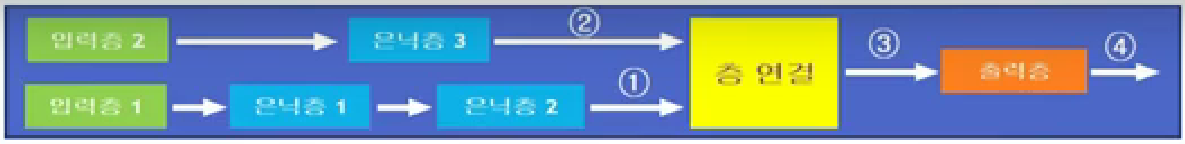

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

In [ ]:
# 입력층 1에 대한 신경망
input_1 = Input(shape=(4,))

hidden_1 = Dense(8, activation='relu')(input_1)
hidden_2 = Dense(16, activation='relu')(hidden_1)

output_1 = Model(inputs=input_1, outputs=hidden_2)

# 입력층 2에 대한 신경망
input_2 = Input(shape=(8,))

hidden_3 = Dense(8, activation='relu')(input_2)

output_2 = Model(inputs=input_2, outputs=hidden_3)

# 층 연결
result = concatenate([output_1.output, output_2.output])

 # 출력층 정의
output_ = Dense(10, activation='softmax')(result)

 # 최종 모델 구축
model = Model(inputs=[output_1.input, output_2.input], outputs=output_)

model.summary()

# Functional API CNN 모델 구축 Example - MNIST 

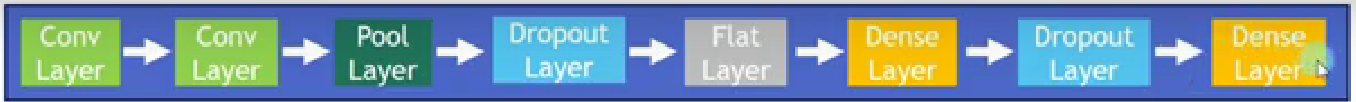

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tf.__version__

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

# print(x_train[0])
# print(x_test[0])

In [ ]:
input_ = Input(shape=(28, 28, 1))

x = Conv2D(filters=32, kernel_size=(3), activation='relu')(input_)
x = Conv2D(filters=64, kernel_size=(3), activation='relu')(x)
x = MaxPool2D(pool_size=(2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation='softmax')(x)

cnn = Model(inputs=input_, outputs=output_)
cnn.summary()

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

In [ ]:
cnn.evaluate(x_test, y_test)

In [ ]:
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend(loc='best')
plt.show()

# Functional API 사용시 혼동하는 경우!!

1. 첫 번째 코드
- input_ = Input(shape=(28,28,1))
- x = Conv2D(32, 3, activation='relu)
- x = x(input_)
- output_ = Dense(10, activation='softmax')
- output_ = output_(x)

2. 두 번째 코드
- input_ = Input(shape=(28,28,1))
- x = Conv2D(32, 3, activation='relu)(x)
- output_ = Dense(10, activation='softmax')(x)

3. 첫 번째 코드와 두 번째 코드는 동일한 코드이다. 
- 간혹 첫 번째 코드에 대해 일반 함수를 호출하는 것과 혼동하는 경우가 있다고 함. (일반함수 호출하는 형식과 동일하기 때문에)